# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
# Added liabraries
from scipy.spatial.distance import cdist

In [3]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [4]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [5]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Show a lineplot of fraction of total variance vs. number of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

The first 1 principal components explain 16.4 fraction of the total variance.
The first 2 principal components explain 29.73 fraction of the total variance.
The first 3 principal components explain 39.9 fraction of the total variance.
The first 4 principal components explain 46.96 fraction of the total variance.
The first 5 principal components explain 50.83 fraction of the total variance.
The first 10 principal components explain 65.22 fraction of the total variance.
The first 20 principal components explain 80.89 fraction of the total variance.
The first 30 principal components explain 89.84 fraction of the total variance.
The first 40 principal components explain 95.09 fraction of the total variance.
The first 50 principal components explain 98.21 fraction of the total variance.


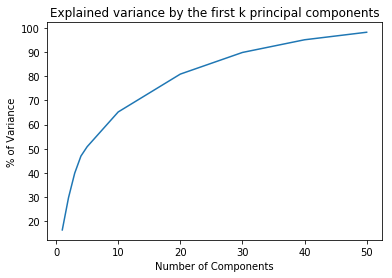

In [6]:
def P1(k_values):
    """1. Principal components analysis on the data. 
    2. Show fraction of the total variance in the training data is explained by the first k principal components, 
    for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]. 
    3. Show a lineplot of fraction of total variance vs. number of principal components.
    
    PARAMETERS: 
    - components - list of k
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###
    # initilize explained variance list
    ev_list = []
    
    # for k values calculate explained variance ratio 
    for k in k_values:
        pca = PCA(n_components = k)
        
        #Train PCA
        model = pca.fit_transform(train_data) 
        
        # Calculate cumulative explained variance
        explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)*100
        print('The first {0} principal components explain {1:.4} fraction of the total variance.'\
              .format(k,explained_variance_ratio[k-1]))
        
        ev_list.append(explained_variance_ratio[k-1])
        
    # plot explained variance 
    plt.plot(k_values, ev_list) 
    plt.title('Explained variance by the first k principal components')
    plt.ylabel('% of Variance')
    plt.xlabel('Number of Components')
    
### STUDENT END ###
components = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
P1(components)

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

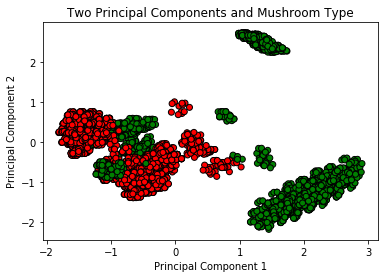

In [7]:
def P2():
    """Project the training data down to 2 dimensions and plot it. 
    Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###
    
    # Train the PCA Model
    pca = PCA(n_components=2)
    model = pca.fit_transform(train_data)
    
    # Prepare data
    poisonous_dict = {0:'red', 1:'green'}
    colours_poison = [poisonous_dict[i] for i in train_labels]
    
    # Plot
    plt.scatter(model[:,0], model[:,1], c=colours_poison, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Two Principal Components and Mushroom Type') 

### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

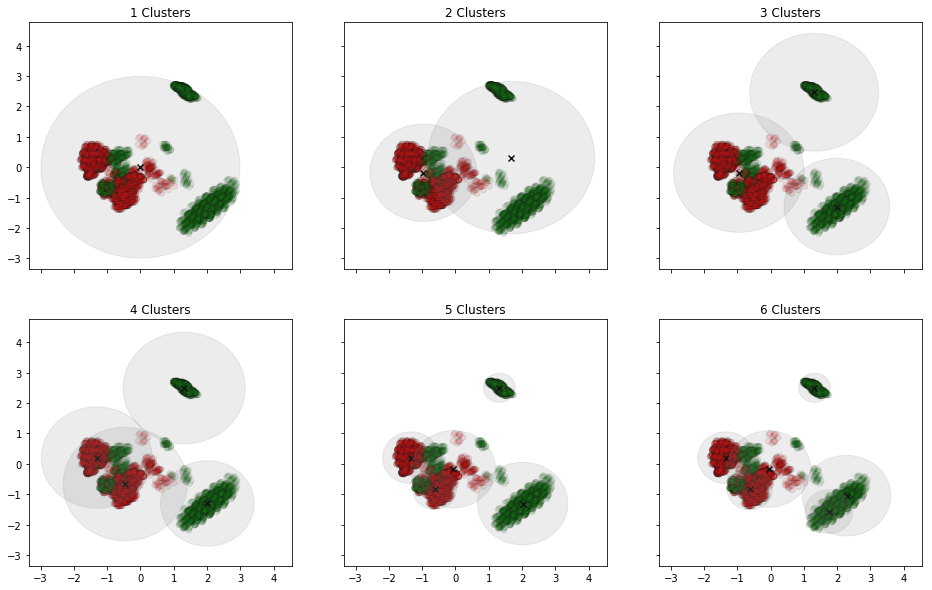

In [8]:
def P3():

### STUDENT START ###
    """Fit a k-means cluster model with 6 clusters over the 2d projected data.
    For each cluster, mark the centroid and plot a circle,
    that goes through the cluster's example that is most distant from the centroid.
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
    k = 6 
    
    # Train the PCA Model
    pca = PCA(n_components=2)
    model = pca.fit_transform(train_data)
    
    fig, axes = plt.subplots(2, 3, figsize = (16, 10), sharex=True, sharey=True)
    
    # For each subplot
    for i, ax in enumerate(axes.reshape(-1)):

        # Prepare data
        poisonous_dict = {0:'red', 1:'green'}
        colours_poison = [poisonous_dict[i] for i in train_labels]
        
        # Plot
        ax.scatter(x = model[:,0], y = model[:,1], c= colours_poison, edgecolors='black', alpha=0.1)
        
        # Fit Kmeans
        kmeans = KMeans(n_clusters=(i+1))
        kmeans.fit(model)
        
        # For each cluster
        for cluster_number, cluster_centre in enumerate(kmeans.cluster_centers_): 
            
            # Get centroid points
            x, y = cluster_centre 
            
            # Plot the Centroids
            ax.scatter(x, y , marker='x', c='black') 
            
            # Calculate radius of circle
            clusterRadius = cdist(model[kmeans.labels_ == cluster_number], [kmeans.cluster_centers_[cluster_number]]).max()
            
            # Plot Circles
            clusterCircle = plt.Circle((x, y), clusterRadius, color='grey', alpha=0.15)
            ax.add_patch(clusterCircle)
       
        ax.set_title(str(i+1)+" Clusters")
        
### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show plots of the estimated density contours.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

C:\Users\walek\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Users\walek\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Users\walek\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Users\walek\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Users\walek\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Users\walek\Anaconda3\lib\site-p

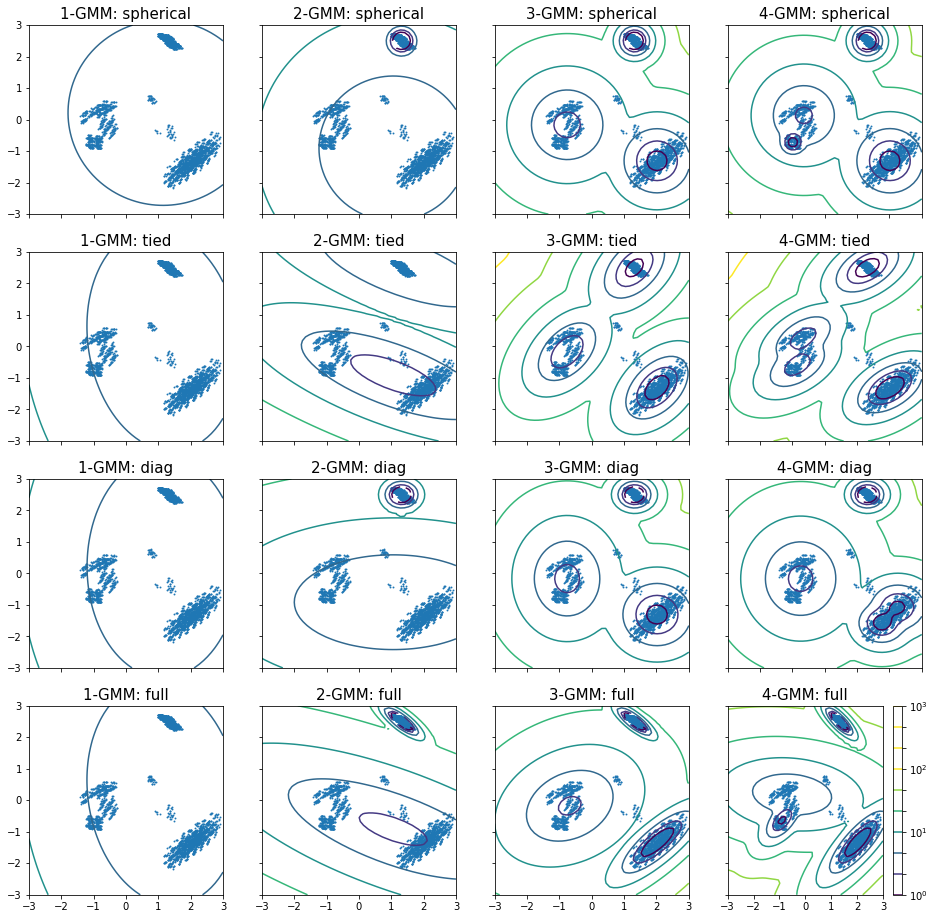

In [9]:
def P4():
    """Gaussian mixture models for the positive (poisonous) examples.
    Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full'.
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
### STUDENT START ###
    
    # Train the PCA Model
    pca = PCA(n_components=2)
    model_pca = pca.fit_transform(train_data)
    model_pca_green = model_pca[train_labels == 1]
    
    mixture_components = [1, 2, 3, 4]
    covariance_type = ['spherical', 'tied', 'diag', 'full']
    
    fig, axes = plt.subplots(4, 4, figsize = (16, 16), sharex=True, sharey=True)
      
    for i, covariance in enumerate(covariance_type):
        for j, mixture in enumerate(mixture_components):
            
            # Fit GMM model
            model_gauss = GaussianMixture(n_components = mixture, covariance_type = covariance)
            model_gauss.fit(model_pca_green)
            
            # Predicted scores
            x = np.linspace(-3., 3.)
            y = np.linspace(-3., 3.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -model_gauss.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            # Plot and set title
            axes[i][j].scatter(model_pca_green[:, 0], model_pca_green[:, 1], .8)
            axes[i][j].set_title('{}-GMM: {}'.format(mixture, covariance), fontsize=15)
            
            CS = axes[i][j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                             levels=np.logspace(0, 3, 10))
            
            
    CB = plt.colorbar(CS)

                        
    ### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy or you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [10]:
def P5():
    """Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. 
    Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities. 
    Calculate accuracy of predictions on the test data.
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
    
### STUDENT START ###
    
    # Train the PCA Model
    pca = PCA(n_components=2)
    model_pca = pca.fit_transform(train_data)
    model_pca_test = pca.transform(test_data)
    
    # Subset of data
    model_pca_green = model_pca[train_labels == 1]
    model_pca_red = model_pca[train_labels == 0]
   
    # fit a 4-component full covariance GaussianMixture model for positive examples
    model_green = GaussianMixture(n_components=4, covariance_type='full')
    model_green.fit(model_pca_green)
    scores_green = model_green.score_samples(model_pca_test)
    
    # fit a 4-component full covariance GaussianMixture model for negative examples
    model_red = GaussianMixture(n_components=4, covariance_type='full')
    model_red.fit(model_pca_red)
    scores_red = model_red.score_samples(model_pca_test)
    
    # Evaluate Prediction
    predictions = []
    
    for i in range(0, len(scores_green)):
        if scores_green[i] > scores_red[i]:
            predictions.append(1)
        else:
            predictions.append(0)
            
    # Calculate accuracy
    print("Accuracy: ", round(np.mean(predictions == test_labels)*100,2),' %')

    ### STUDENT END ###

P5()

Accuracy:  95.02  %


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

$$( (3 \, mean \, vectors + 3 \, covariance \, matrices) * 2 \, gmm \, components ) * 2 \, classes = 24 \, parameters$$

In [11]:
def Calculate_Accuracy(scores_green, scores_red):
    """Find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters. 
    Vary the number of PCA components, the number of GMM components, and the covariance type.
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """    
    # Evaluate Prediction
    predictions = []
    
    for i in range(0, len(scores_green)):
        if scores_green[i] > scores_red[i]:
            predictions.append(1)
        else:
            predictions.append(0)
            
    # Calculate accuracy
    accuracy= round(np.mean(predictions == test_labels),2)
    
    return accuracy

def P6():
    """Calculate accuracy
    
    PARAMETERS: 
    - scores_green - not poisonous
    - scores_red - poisonous
    
    RETURNS: 
    - accuracy score
    """  
### STUDENT START ###

    mixture_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    covariance_types = ['spherical', 'tied', 'diag', 'full']
    pca_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
    
    top_accuracy = 0.0
    top_covariance = ""
    top_PCAComponent = 0
    top_parameters = 0
    top_mixture = 0
    
    # Iterate through our search region
    for mixture in mixture_components:
        for covariance in covariance_types:
            for component in pca_components:
                # Train the PCA Model
                pca = PCA(n_components=2)
                model_pca = pca.fit_transform(train_data)
                model_pca_test = pca.transform(test_data)
    
                # Subset of data
                model_pca_green = model_pca[train_labels == 1]
                model_pca_red = model_pca[train_labels == 0]
   
                # fit a 4-component full covariance GaussianMixture model for positive examples
                model_green = GaussianMixture(n_components=4, covariance_type='full')
                model_green.fit(model_pca_green)
                scores_green = model_green.score_samples(model_pca_test)
    
                # fit a 4-component full covariance GaussianMixture model for negative examples
                model_red = GaussianMixture(n_components=4, covariance_type='full')
                model_red.fit(model_pca_red)
                scores_red = model_red.score_samples(model_pca_test)
                
                # Calculate the Number of Parameters
                covar, means = model_green.covariances_, model_green.means_
                covariance_parameters = len(covar.flatten())
                mean_parameters = len(means.flatten())
                
                parameters = 2 * mixture * (covariance_parameters + mean_parameters)

                accuracy = Calculate_Accuracy(scores_green, scores_red)
                
                # best accuracy and 50 parameters or less
                if accuracy > top_accuracy and parameters <= 50: 
                    top_accuracy = accuracy
                    top_covariance = covariance
                    top_PCAComponent = component
                    top_parameters = parameters
                    top_mixture = mixture
    print('*** BEST COMBINATION ***')
    print("Best Accuracy: {:.3} %".format(top_accuracy*100))
    print("Best Covariance: {}".format(top_covariance))
    print("Best PCA Choice: {}".format(top_PCAComponent))
    print("Best Mixture Choice: {}".format(top_mixture))
    print("Total Parameters: {}".format(top_parameters))
    
### STUDENT END ###

P6()

*** BEST COMBINATION ***
Best Accuracy: 95.0 %
Best Covariance: spherical
Best PCA Choice: 1
Best Mixture Choice: 1
Total Parameters: 48
